## Imports 

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib.cm as cm
from easygui import *

## Select File

In [2]:
def selectImage():
    path = fileopenbox()
    return cv.imread(path)

## Detecting the contours & corners of the document

In [3]:
def getContours(img,original):
    contours,hierarchy = cv.findContours(img,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)
    border = np.zeros_like(original)
    corners = np.zeros_like(original)
    
    for cnt in contours:
        area = cv.contourArea(cnt) 
        
        if area>10000:
            cv.drawContours(border, cnt, -1, (255, 0, 0), 3)
            
            perimeter = cv.arcLength(cnt,True)
            approx = cv.approxPolyDP(cnt,0.02*perimeter,True)
            objCor = len(approx)
            
            for corner in approx:
                x = int(corner[0][0])
                y = int(corner[0][1])
                cv.circle(corners,(x,y),10,(255,0,0),cv.FILLED)
    return approx, border, corners

## Detecting the document

In [4]:
def getDocumentCorners(img):
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    
    # Thresholding
    thresh1 = cv.inRange(gray, 155, 255)
    
    # Morphing the thresholded mask
    shape = cv.getStructuringElement(cv.MORPH_ELLIPSE,(7,7))

    mask = cv.morphologyEx(thresh1,cv.MORPH_CLOSE,shape)
    mask = cv.morphologyEx(mask,cv.MORPH_OPEN,shape)
    
    # Detecting the contours and corners
    cornerPoints, border, corners = getContours(mask,img)
    
    return cornerPoints, thresh1, mask, border, corners, gray

## Display Result 

In [5]:
def showResult(img,gray,threshold,mask,border,corners):
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    
    fig, ax = plt.subplots(ncols = 2, nrows = 3,figsize=(20,20))
    
    ax[0,0].imshow(img)
    ax[0,0].set_title('Original')

    ax[0,1].imshow(gray,cmap = cm.gray)
    ax[0,1].set_title('Grayscale')

    ax[1,0].imshow(threshold,cmap = cm.gray)
    ax[1,0].set_title('Thresholded')

    ax[1,1].imshow(mask,cmap = cm.gray)
    ax[1,1].set_title('Mask')

    ax[2,0].imshow(border)
    ax[2,0].set_title('Border')

    ax[2,1].imshow(corners)
    ax[2,1].set_title('Corners')

    plt.show

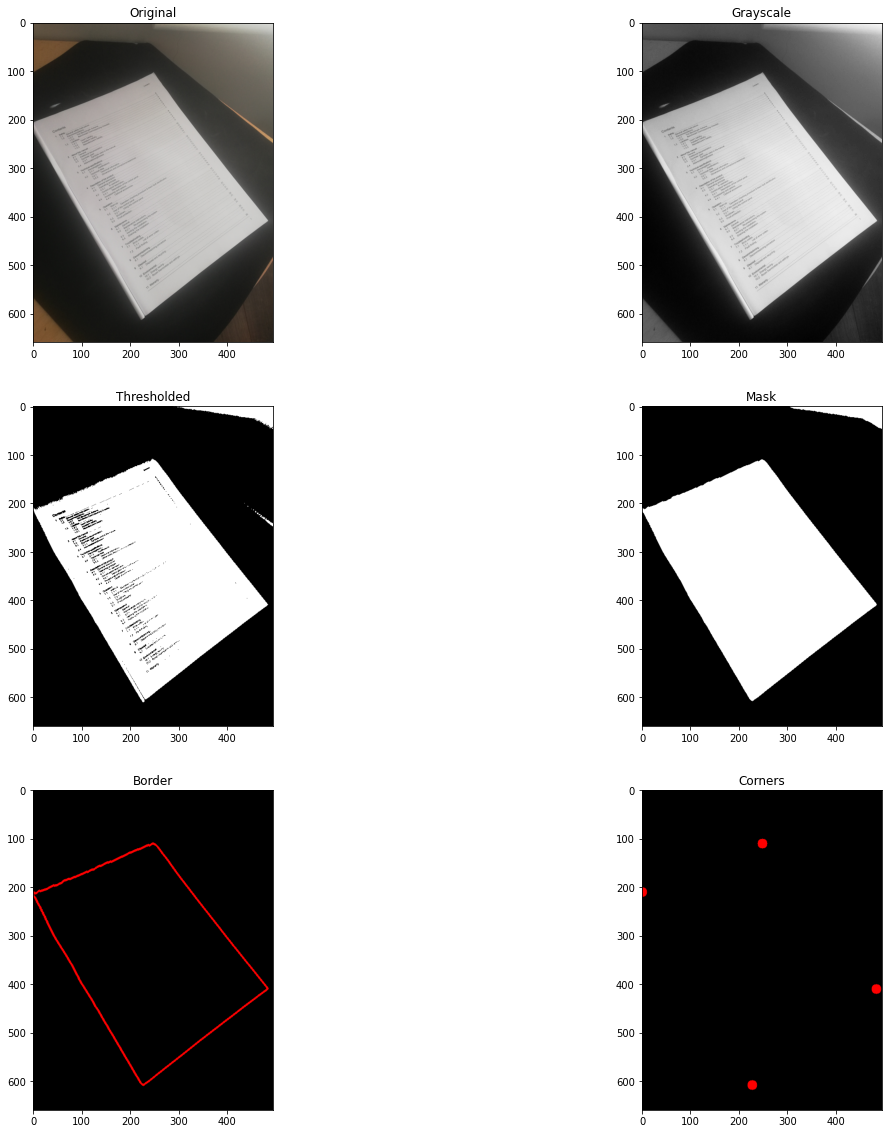

In [6]:
def main():
    img = selectImage()
    cornerPoints, threshold, mask, border, corners, gray = getDocumentCorners(img)
    showResult(img,gray,threshold,mask,border,corners)

main()